## Gemstone Price Prediction

Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.

In [1]:
%pwd

'd:\\Artifical Intelligence World\\08. AI Operations\\2. MLOps\\Workshops\\YouTube\\INeuron Intelligence\\End-To-End-Gemstone-Price-Prediction-MLOps-Pipeline\\experiments'

In [2]:
import os

os.chdir("..")

In [3]:
%pwd

'd:\\Artifical Intelligence World\\08. AI Operations\\2. MLOps\\Workshops\\YouTube\\INeuron Intelligence\\End-To-End-Gemstone-Price-Prediction-MLOps-Pipeline'

### Simple EDA & Feature Engineering ??

In [4]:
import pandas as pd

data = pd.read_csv("artifacts/train.csv")

data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,87141,0.32,Ideal,G,VVS2,61.4,57.0,4.42,4.37,2.70,936
1,69475,0.73,Ideal,F,VS2,62.1,57.0,5.76,5.79,3.59,2846
2,167226,1.02,Ideal,J,SI2,60.3,56.0,6.58,6.57,3.97,3104
3,18532,0.41,Good,J,VS2,63.4,54.4,4.72,4.75,3.00,637
4,173021,1.51,Ideal,G,VS1,62.2,56.0,7.31,7.40,4.57,11605
...,...,...,...,...,...,...,...,...,...,...,...
145174,7025,1.51,Very Good,I,SI1,63.2,56.0,7.26,7.30,4.59,8288
145175,51858,0.31,Ideal,D,SI2,61.4,56.0,4.39,4.37,2.69,568
145176,122809,0.30,Good,D,SI1,63.1,58.0,4.27,4.25,2.69,756
145177,161988,0.90,Ideal,I,VS1,61.9,56.0,6.18,6.22,3.84,3334


In [5]:
data["cut"].value_counts()

cut
Ideal        69410
Premium      37374
Very Good    28133
Good          8773
Fair          1489
Name: count, dtype: int64

In [6]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,87141,0.32,Ideal,G,VVS2,61.4,57.0,4.42,4.37,2.70,936
1,69475,0.73,Ideal,F,VS2,62.1,57.0,5.76,5.79,3.59,2846
2,167226,1.02,Ideal,J,SI2,60.3,56.0,6.58,6.57,3.97,3104
3,18532,0.41,Good,J,VS2,63.4,54.4,4.72,4.75,3.00,637
4,173021,1.51,Ideal,G,VS1,62.2,56.0,7.31,7.40,4.57,11605


In [7]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
145174,7025,1.51,Very Good,I,SI1,63.2,56.0,7.26,7.30,4.59,8288
145175,51858,0.31,Ideal,D,SI2,61.4,56.0,4.39,4.37,2.69,568
145176,122809,0.30,Good,D,SI1,63.1,58.0,4.27,4.25,2.69,756
145177,161988,0.90,Ideal,I,VS1,61.9,56.0,6.18,6.22,3.84,3334
145178,481,0.80,Ideal,E,SI1,62.5,57.0,5.96,5.99,3.73,3447


In [8]:
data.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
77000,55085,1.00,Very Good,F,SI1,62.2,56.0,6.36,6.43,3.98,4831
49253,144572,0.50,Ideal,G,VS2,61.8,55.0,5.12,5.15,3.17,1559
144818,101114,0.67,Ideal,G,VS1,62.6,57.0,5.53,5.50,3.45,2163
116097,120479,0.25,Very Good,E,VVS2,63.0,57.0,4.00,4.06,2.54,575
49493,10468,1.01,Ideal,H,SI1,62.4,56.0,6.44,6.41,4.01,4899
139394,123312,1.01,Ideal,G,VS1,62.1,57.0,6.44,6.40,3.99,6732
859,107252,0.90,Good,I,SI1,63.8,58.0,6.09,6.15,3.91,4682
91195,167880,0.91,Ideal,F,SI2,61.7,56.0,6.21,6.25,3.85,4077
138880,51111,0.41,Very Good,F,VVS1,63.4,55.0,4.70,4.73,3.00,1143
43645,35226,1.09,Ideal,G,VS2,61.6,56.0,6.61,6.65,4.08,7711


In [9]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
data.shape

(145179, 11)

In [11]:
data.size

1596969

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145179 entries, 0 to 145178
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       145179 non-null  int64  
 1   carat    145179 non-null  float64
 2   cut      145179 non-null  object 
 3   color    145179 non-null  object 
 4   clarity  145179 non-null  object 
 5   depth    145179 non-null  float64
 6   table    145179 non-null  float64
 7   x        145179 non-null  float64
 8   y        145179 non-null  float64
 9   z        145179 non-null  float64
 10  price    145179 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 12.2+ MB


In [13]:
data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [14]:
data.drop(labels=["id"], axis=1, inplace=True)

data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.32,Ideal,G,VVS2,61.4,57.0,4.42,4.37,2.70,936
1,0.73,Ideal,F,VS2,62.1,57.0,5.76,5.79,3.59,2846
2,1.02,Ideal,J,SI2,60.3,56.0,6.58,6.57,3.97,3104
3,0.41,Good,J,VS2,63.4,54.4,4.72,4.75,3.00,637
4,1.51,Ideal,G,VS1,62.2,56.0,7.31,7.40,4.57,11605
...,...,...,...,...,...,...,...,...,...,...
145174,1.51,Very Good,I,SI1,63.2,56.0,7.26,7.30,4.59,8288
145175,0.31,Ideal,D,SI2,61.4,56.0,4.39,4.37,2.69,568
145176,0.30,Good,D,SI1,63.1,58.0,4.27,4.25,2.69,756
145177,0.90,Ideal,I,VS1,61.9,56.0,6.18,6.22,3.84,3334


In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [17]:
data.dtypes == "object"

carat      False
cut         True
color       True
clarity     True
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

In [18]:
data.columns[data.dtypes == "object"]

Index(['cut', 'color', 'clarity'], dtype='object')

In [19]:
cat_columns = data.columns[data.dtypes == "object"]

cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [20]:
data[cat_columns]

,cut,color,clarity
0,Ideal,G,VVS2
1,Ideal,F,VS2
2,Ideal,J,SI2
3,Good,J,VS2
4,Ideal,G,VS1
...,...,...,...
145174,Very Good,I,SI1
145175,Ideal,D,SI2
145176,Good,D,SI1
145177,Ideal,I,VS1


In [21]:
data[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145179 entries, 0 to 145178
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cut      145179 non-null  object
 1   color    145179 non-null  object
 2   clarity  145179 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [22]:
data[cat_columns].describe().T

,count,unique,top,freq
cut,145179,5,Ideal,69410
color,145179,7,G,33325
clarity,145179,8,SI1,39926


In [23]:
for col in cat_columns:
    print(data[col].value_counts())
    print(f"Here Its Total Count => {len(data[col].value_counts())}")
    print("=" * 40)

cut
Ideal        69410
Premium      37374
Very Good    28133
Good          8773
Fair          1489
Name: count, dtype: int64
Here Its Total Count => 5
color
G    33325
E    26934
F    25725
H    23051
D    18234
I    13096
J     4814
Name: count, dtype: int64
Here Its Total Count => 7
clarity
SI1     39926
VS2     36034
VS1     22946
SI2     22817
VVS2    11839
VVS1     8112
IF       3115
I1        390
Name: count, dtype: int64
Here Its Total Count => 8


In [24]:
num_columns = data.columns[data.dtypes != "object"]

num_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [25]:
data[num_columns]

,carat,depth,table,x,y,z,price
0,0.32,61.4,57.0,4.42,4.37,2.70,936
1,0.73,62.1,57.0,5.76,5.79,3.59,2846
2,1.02,60.3,56.0,6.58,6.57,3.97,3104
3,0.41,63.4,54.4,4.72,4.75,3.00,637
4,1.51,62.2,56.0,7.31,7.40,4.57,11605
...,...,...,...,...,...,...,...
145174,1.51,63.2,56.0,7.26,7.30,4.59,8288
145175,0.31,61.4,56.0,4.39,4.37,2.69,568
145176,0.30,63.1,58.0,4.27,4.25,2.69,756
145177,0.90,61.9,56.0,6.18,6.22,3.84,3334


In [26]:
data[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145179 entries, 0 to 145178
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   carat   145179 non-null  float64
 1   depth   145179 non-null  float64
 2   table   145179 non-null  float64
 3   x       145179 non-null  float64
 4   y       145179 non-null  float64
 5   z       145179 non-null  float64
 6   price   145179 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 7.8 MB


In [27]:
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,145179.0,0.790210,0.462920,0.2,0.40,0.70,1.03,3.50
depth,145179.0,61.820518,1.082570,53.1,61.30,61.90,62.40,71.60
table,145179.0,57.225191,1.919658,49.0,56.00,57.00,58.00,79.00
x,145179.0,5.714056,1.109458,0.0,4.70,5.70,6.51,9.65
y,145179.0,5.718908,1.102379,0.0,4.71,5.72,6.51,10.01
z,145179.0,3.533472,0.689938,0.0,2.90,3.53,4.03,31.30
price,145179.0,3968.182554,4038.738745,326.0,951.00,2394.00,5408.00,18818.00


### Some Visualization ??

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

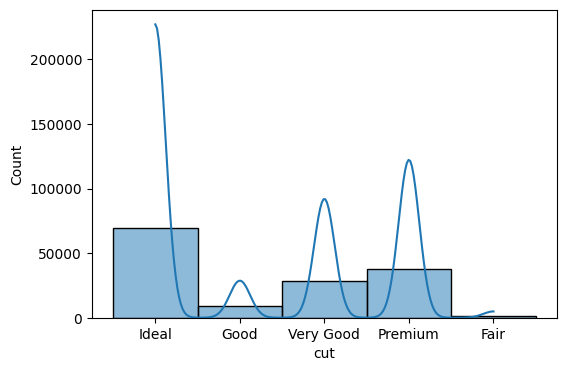

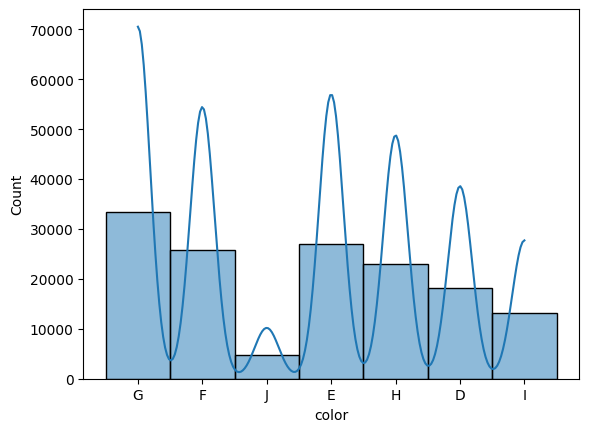

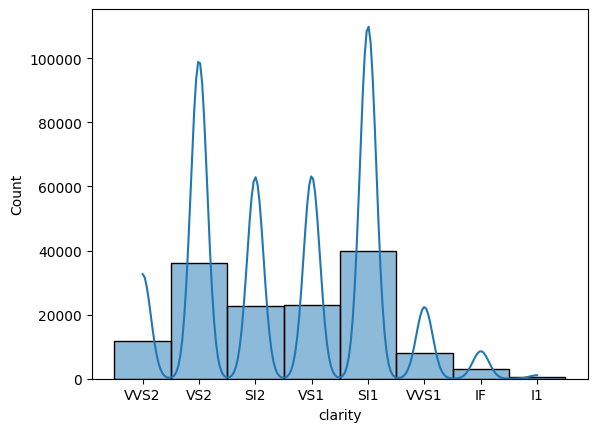

In [29]:
plt.figure(figsize=(6, 4))

for col in cat_columns:
    sns.histplot(data=data, x=col, kde=True)
    plt.show()

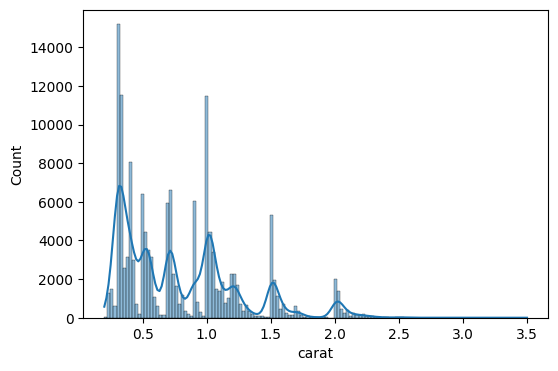

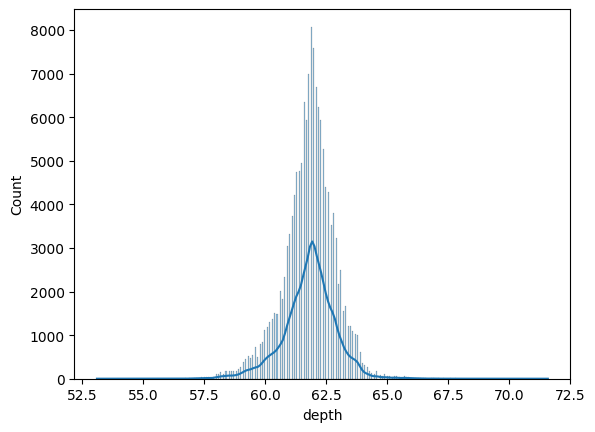

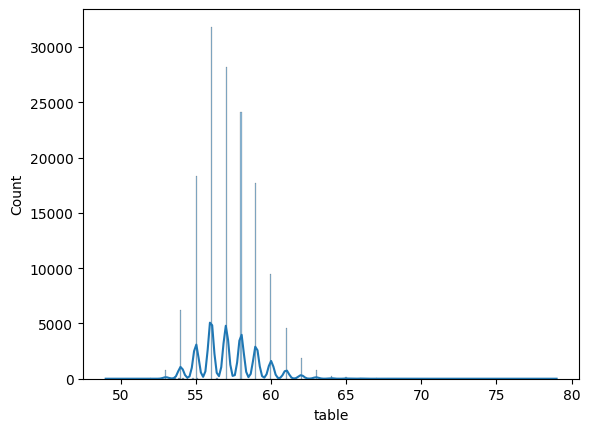

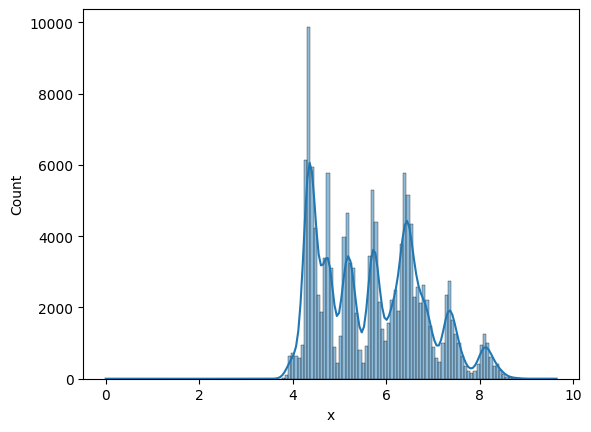

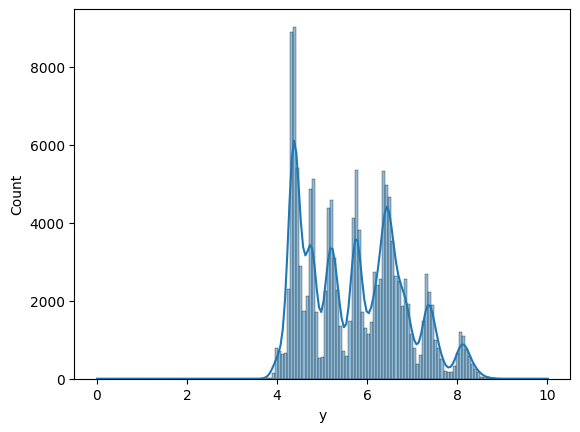

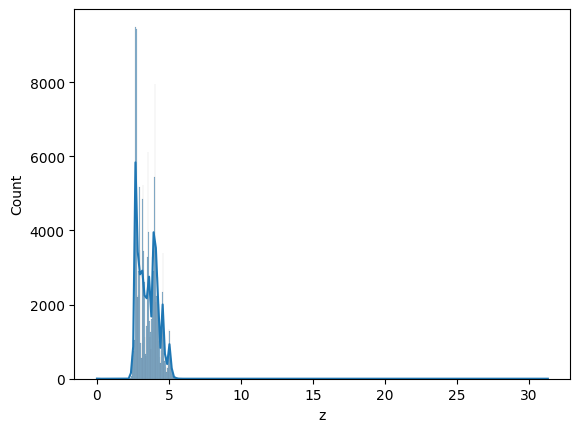

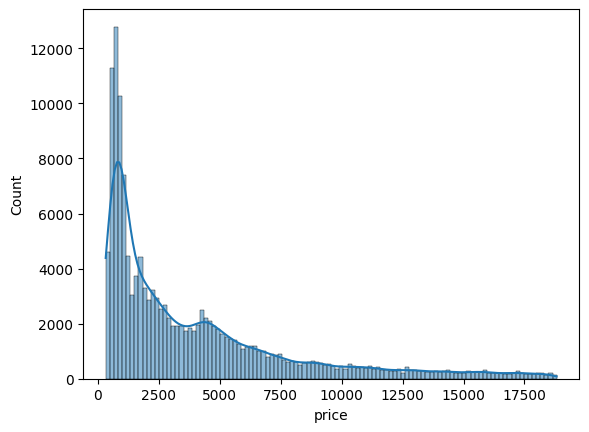

In [30]:
plt.figure(figsize=(6, 4))

for col in num_columns:
    sns.histplot(data=data, x=col, kde=True)
    plt.show()

<Axes: >

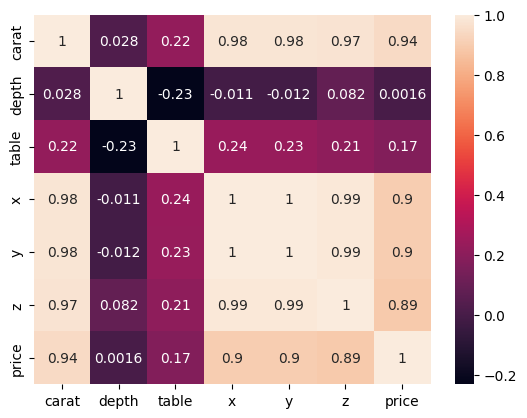

In [31]:
sns.heatmap(data[num_columns].corr(), annot=True)

In [32]:
data[cat_columns]

,cut,color,clarity
0,Ideal,G,VVS2
1,Ideal,F,VS2
2,Ideal,J,SI2
3,Good,J,VS2
4,Ideal,G,VS1
...,...,...,...
145174,Very Good,I,SI1
145175,Ideal,D,SI2
145176,Good,D,SI1
145177,Ideal,I,VS1


In [33]:
## It Is a Oridinal Encoding

cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}

clarity_map = {"I1": 1, "SI2": 2, "SI1": 3,"VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

color_map = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7}

In [34]:
## Mapping Overall These Values Converting them From Categorical To Numerical

data["cut"] = data["cut"].map(cut_map)

data["clarity"] = data["clarity"].map(clarity_map)

data["color"] = data["color"].map(color_map)

Now All Data is Numerical and Ready For Training

In [35]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.32,5,4,6,61.4,57.0,4.42,4.37,2.70,936
1,0.73,5,3,4,62.1,57.0,5.76,5.79,3.59,2846
2,1.02,5,7,2,60.3,56.0,6.58,6.57,3.97,3104
3,0.41,2,7,4,63.4,54.4,4.72,4.75,3.00,637
4,1.51,5,4,5,62.2,56.0,7.31,7.40,4.57,11605
...,...,...,...,...,...,...,...,...,...,...
145174,1.51,3,6,3,63.2,56.0,7.26,7.30,4.59,8288
145175,0.31,5,1,2,61.4,56.0,4.39,4.37,2.69,568
145176,0.30,2,1,3,63.1,58.0,4.27,4.25,2.69,756
145177,0.90,5,6,5,61.9,56.0,6.18,6.22,3.84,3334


### Prepare The Training Data ??

In [36]:
from sklearn.impute import SimpleImputer           # Handling Missing Values
from sklearn.preprocessing import StandardScaler   # Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder   # Ordinal Encoding

## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [37]:
data = pd.read_csv("artifacts/train.csv")

data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,87141,0.32,Ideal,G,VVS2,61.4,57.0,4.42,4.37,2.70,936
1,69475,0.73,Ideal,F,VS2,62.1,57.0,5.76,5.79,3.59,2846
2,167226,1.02,Ideal,J,SI2,60.3,56.0,6.58,6.57,3.97,3104
3,18532,0.41,Good,J,VS2,63.4,54.4,4.72,4.75,3.00,637
4,173021,1.51,Ideal,G,VS1,62.2,56.0,7.31,7.40,4.57,11605
...,...,...,...,...,...,...,...,...,...,...,...
145174,7025,1.51,Very Good,I,SI1,63.2,56.0,7.26,7.30,4.59,8288
145175,51858,0.31,Ideal,D,SI2,61.4,56.0,4.39,4.37,2.69,568
145176,122809,0.30,Good,D,SI1,63.1,58.0,4.27,4.25,2.69,756
145177,161988,0.90,Ideal,I,VS1,61.9,56.0,6.18,6.22,3.84,3334


In [38]:
data.drop(labels=["id"], axis=1, inplace=True)

data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.32,Ideal,G,VVS2,61.4,57.0,4.42,4.37,2.70,936
1,0.73,Ideal,F,VS2,62.1,57.0,5.76,5.79,3.59,2846
2,1.02,Ideal,J,SI2,60.3,56.0,6.58,6.57,3.97,3104
3,0.41,Good,J,VS2,63.4,54.4,4.72,4.75,3.00,637
4,1.51,Ideal,G,VS1,62.2,56.0,7.31,7.40,4.57,11605
...,...,...,...,...,...,...,...,...,...,...
145174,1.51,Very Good,I,SI1,63.2,56.0,7.26,7.30,4.59,8288
145175,0.31,Ideal,D,SI2,61.4,56.0,4.39,4.37,2.69,568
145176,0.30,Good,D,SI1,63.1,58.0,4.27,4.25,2.69,756
145177,0.90,Ideal,I,VS1,61.9,56.0,6.18,6.22,3.84,3334


In [39]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [40]:
X = data.drop(labels=["price"], axis=1)

y = data["price"]

In [41]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.32,Ideal,G,VVS2,61.4,57.0,4.42,4.37,2.70
1,0.73,Ideal,F,VS2,62.1,57.0,5.76,5.79,3.59
2,1.02,Ideal,J,SI2,60.3,56.0,6.58,6.57,3.97
3,0.41,Good,J,VS2,63.4,54.4,4.72,4.75,3.00
4,1.51,Ideal,G,VS1,62.2,56.0,7.31,7.40,4.57
...,...,...,...,...,...,...,...,...,...
145174,1.51,Very Good,I,SI1,63.2,56.0,7.26,7.30,4.59
145175,0.31,Ideal,D,SI2,61.4,56.0,4.39,4.37,2.69
145176,0.30,Good,D,SI1,63.1,58.0,4.27,4.25,2.69
145177,0.90,Ideal,I,VS1,61.9,56.0,6.18,6.22,3.84


In [42]:
y

0           936
1          2846
2          3104
3           637
4         11605
          ...  
145174     8288
145175      568
145176      756
145177     3334
145178     3447
Name: price, Length: 145179, dtype: int64

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145179 entries, 0 to 145178
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    145179 non-null  float64
 1   cut      145179 non-null  object 
 2   color    145179 non-null  object 
 3   clarity  145179 non-null  object 
 4   depth    145179 non-null  float64
 5   table    145179 non-null  float64
 6   x        145179 non-null  float64
 7   y        145179 non-null  float64
 8   z        145179 non-null  float64
dtypes: float64(6), object(3)
memory usage: 10.0+ MB


In [44]:
X.select_dtypes(include="object")

,cut,color,clarity
0,Ideal,G,VVS2
1,Ideal,F,VS2
2,Ideal,J,SI2
3,Good,J,VS2
4,Ideal,G,VS1
...,...,...,...
145174,Very Good,I,SI1
145175,Ideal,D,SI2
145176,Good,D,SI1
145177,Ideal,I,VS1


In [45]:
cat_cols = X.select_dtypes(include="object").columns

cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [46]:
X.select_dtypes(exclude="object")

,carat,depth,table,x,y,z
0,0.32,61.4,57.0,4.42,4.37,2.70
1,0.73,62.1,57.0,5.76,5.79,3.59
2,1.02,60.3,56.0,6.58,6.57,3.97
3,0.41,63.4,54.4,4.72,4.75,3.00
4,1.51,62.2,56.0,7.31,7.40,4.57
...,...,...,...,...,...,...
145174,1.51,63.2,56.0,7.26,7.30,4.59
145175,0.31,61.4,56.0,4.39,4.37,2.69
145176,0.30,63.1,58.0,4.27,4.25,2.69
145177,0.90,61.9,56.0,6.18,6.22,3.84


In [47]:
num_cols = X.select_dtypes(exclude="object").columns

num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [48]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer()),
        ("scalar", StandardScaler())
    ]
)

In [51]:
num_pipeline

,steps,"[('imputer', ...), ('scalar', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [49]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [50]:
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories]))
    ]
)

In [52]:
cat_pipeline

,steps,"[('imputer', ...), ('ordinalencoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['Fair', 'Good', ...], ['D', 'E', ...], ...]"


In [ ]:
preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, num_cols),
        ("cat_pipeline", cat_pipeline, cat_cols)
    ]
)

In [54]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.32,Ideal,G,VVS2,61.4,57.0,4.42,4.37,2.70
1,0.73,Ideal,F,VS2,62.1,57.0,5.76,5.79,3.59
2,1.02,Ideal,J,SI2,60.3,56.0,6.58,6.57,3.97
3,0.41,Good,J,VS2,63.4,54.4,4.72,4.75,3.00
4,1.51,Ideal,G,VS1,62.2,56.0,7.31,7.40,4.57
...,...,...,...,...,...,...,...,...,...
145174,1.51,Very Good,I,SI1,63.2,56.0,7.26,7.30,4.59
145175,0.31,Ideal,D,SI2,61.4,56.0,4.39,4.37,2.69
145176,0.30,Good,D,SI1,63.1,58.0,4.27,4.25,2.69
145177,0.90,Ideal,I,VS1,61.9,56.0,6.18,6.22,3.84


In [55]:
y

0           936
1          2846
2          3104
3           637
4         11605
          ...  
145174     8288
145175      568
145176      756
145177     3334
145178     3447
Name: price, Length: 145179, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
print(f"X_train Shape => {X_train.shape}")
print(f"X_test Shape => {X_test.shape}")
print(f"y_train Shape => {y_train.shape}")
print(f"y_test Shape => {y_test.shape}")

X_train Shape => (101625, 9)
X_test Shape => (43554, 9)
y_train Shape => (101625,)
y_test Shape => (43554,)


In [60]:
preprocessor.fit_transform(X_train)

array([[-1.16534826,  0.16590018, -1.15937112, ...,  4.        ,
         4.        ,  6.        ],
       [-0.81973069, -0.01909881, -0.63790827, ...,  4.        ,
         2.        ,  5.        ],
       [-1.05734277,  0.25839967, -0.63790827, ...,  4.        ,
         3.        ,  5.        ],
       ...,
       [-0.77652849, -1.40659123, -0.63790827, ...,  4.        ,
         6.        ,  3.        ],
       [ 0.49793629,  0.16590018, -0.11644541, ...,  4.        ,
         3.        ,  3.        ],
       [ 0.56273958, -3.07158213,  1.969406  , ...,  3.        ,
         1.        ,  2.        ]], shape=(101625, 9))

In [62]:
preprocessor.transform(X_test)

array([[ 0.02271213,  0.44339866, -0.63790827, ...,  4.        ,
         2.        ,  2.        ],
       [-0.84133179,  1.09089512, -2.20229683, ...,  4.        ,
         0.        ,  1.        ],
       [-0.90613508, -1.49909072,  2.49086885, ...,  2.        ,
         2.        ,  6.        ],
       ...,
       [-1.01414057,  0.16590018, -0.11644541, ...,  4.        ,
         4.        ,  6.        ],
       [ 0.26032421,  0.35089916, -0.63790827, ...,  4.        ,
         5.        ,  3.        ],
       [-0.81973069,  0.62839765,  0.92648029, ...,  3.        ,
         4.        ,  6.        ]], shape=(43554, 9))

In [64]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [65]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())

X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [66]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-1.165348,0.165900,-1.159371,-1.506422,-1.484439,-1.477898,4.0,4.0,6.0
1,-0.819731,-0.019099,-0.637908,-0.839697,-0.822411,-0.812867,4.0,2.0,5.0
2,-1.057343,0.258400,-0.637908,-1.326226,-1.303062,-1.289955,4.0,3.0,5.0
3,1.124368,-0.389097,-0.116445,1.169489,1.127397,1.124397,4.0,3.0,4.0
4,-1.186949,-1.129093,1.969406,-1.551471,-1.529783,-1.593556,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...
101620,-0.560518,0.350899,-0.637908,-0.461285,-0.441518,-0.436980,4.0,3.0,4.0
101621,-0.193299,1.830891,-0.116445,-0.100893,-0.078763,0.054565,1.0,0.0,2.0
101622,-0.776528,-1.406591,-0.637908,-0.731579,-0.713585,-0.812867,4.0,6.0,3.0
101623,0.497936,0.165900,-0.116445,0.664940,0.646747,0.661767,4.0,3.0,3.0


In [67]:
X_test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.022712,0.443399,-0.637908,0.214450,0.229578,0.271423,4.0,2.0,2.0
1,-0.841332,1.090895,-2.202297,-0.893756,-0.894962,-0.798410,4.0,0.0,1.0
2,-0.906135,-1.499091,2.490869,-0.902766,-0.976582,-1.044182,2.0,2.0,6.0
3,0.800352,0.535898,-0.116445,0.908204,0.946020,0.936454,4.0,6.0,4.0
4,0.713947,-0.296597,-0.637908,0.890185,0.927882,0.864168,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
43549,0.627543,-0.759095,0.405017,0.800087,0.837193,0.748510,2.0,1.0,2.0
43550,-1.057343,0.998396,-0.637908,-1.290187,-1.284924,-1.217669,4.0,2.0,3.0
43551,-1.014141,0.165900,-0.116445,-1.191079,-1.212373,-1.174297,4.0,4.0,6.0
43552,0.260324,0.350899,-0.637908,0.430685,0.456300,0.473823,4.0,5.0,3.0


### Model Training ??

In [69]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [70]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Rdige": Ridge(),
    "Elasticnet": ElasticNet(),
    "Randomforest": RandomForestRegressor(),
    "xgboost": XGBRegressor()
}

In [71]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [72]:
list(models)

['LinearRegression', 'Lasso', 'Rdige', 'Elasticnet', 'Randomforest', 'xgboost']

In [73]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [74]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Rdige', 'Elasticnet', 'Randomforest', 'xgboost'])

In [75]:
models.values()

dict_values([LinearRegression(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)])

In [77]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)

    return mae, mse, r2

In [80]:
for i in range(len(list(models))):
    model = list(models.values())[i]

    ## Trian The Model
    model.fit(X_train, y_train)

    ## Model Prediction
    y_pred = model.predict(X_test)

    ## Model Validation
    MAE, MSE, R2 = evaluate_model(y_test, y_pred)

    print("model training performance -> ", model)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("R2 SCORE:", R2)

    r2_list.append(R2)

    print("=" * 50)
    print("")

model training performance ->  LinearRegression()
MSE: 1036988.9195732427
MAE: 677.4867866402282
R2 SCORE: 0.9360075848068803

model training performance ->  Lasso()
MSE: 1036835.8540156498
MAE: 678.6887023277958
R2 SCORE: 0.9360170304571938

model training performance ->  Ridge()
MSE: 1036982.6223224615
MAE: 677.52650041022
R2 SCORE: 0.9360079734091874

model training performance ->  ElasticNet()
MSE: 2266028.458264141
MAE: 1051.6322923640153
R2 SCORE: 0.8601637575835044

model training performance ->  RandomForestRegressor()
MSE: 385552.9069365477
MAE: 315.33971172366944
R2 SCORE: 0.9762075937033624

model training performance ->  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importa

In [81]:
r2_list

[0.9360075848068803,
 0.9360170304571938,
 0.9360079734091874,
 0.8601637575835044,
 0.9763751457304014,
 0.9781405329704285,
 0.9360075848068803,
 0.9360170304571938,
 0.9360079734091874,
 0.8601637575835044,
 0.9762075937033624,
 0.9781405329704285]

In [83]:
max(r2_list)

0.9781405329704285